Work by - Kartikey Singh

## Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [3]:
# import data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# Checking the columns of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# check the shape of data
df.shape

(1470, 35)

In [6]:
# information on data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Understanding the output variable

In [7]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

####  Checking for missing values

In [9]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

We don't seem to have any missing values in our dataset

#### Removing redundant features from dataset

* Features like EmployeeCount, Over18, StandardHours can be removed as these are consistent throughout the data

In [10]:
df = df.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


#### Checking the correlation between independent variables

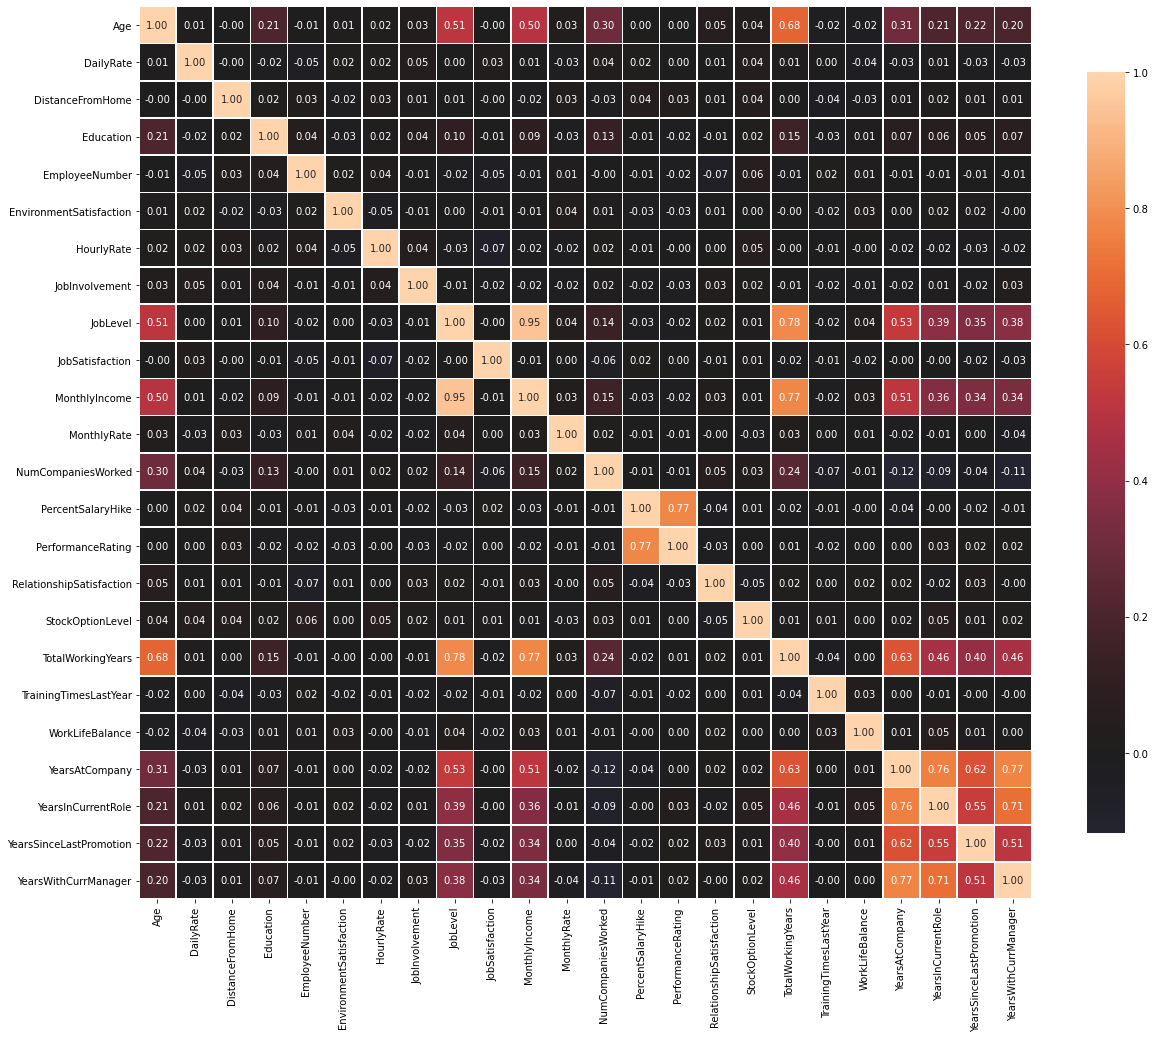

In [11]:
# Checking correlation between independent variables
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(df)

### Dataset visualizations

In [12]:
# All columns with categorical features
list(df.select_dtypes(['object']).columns)

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

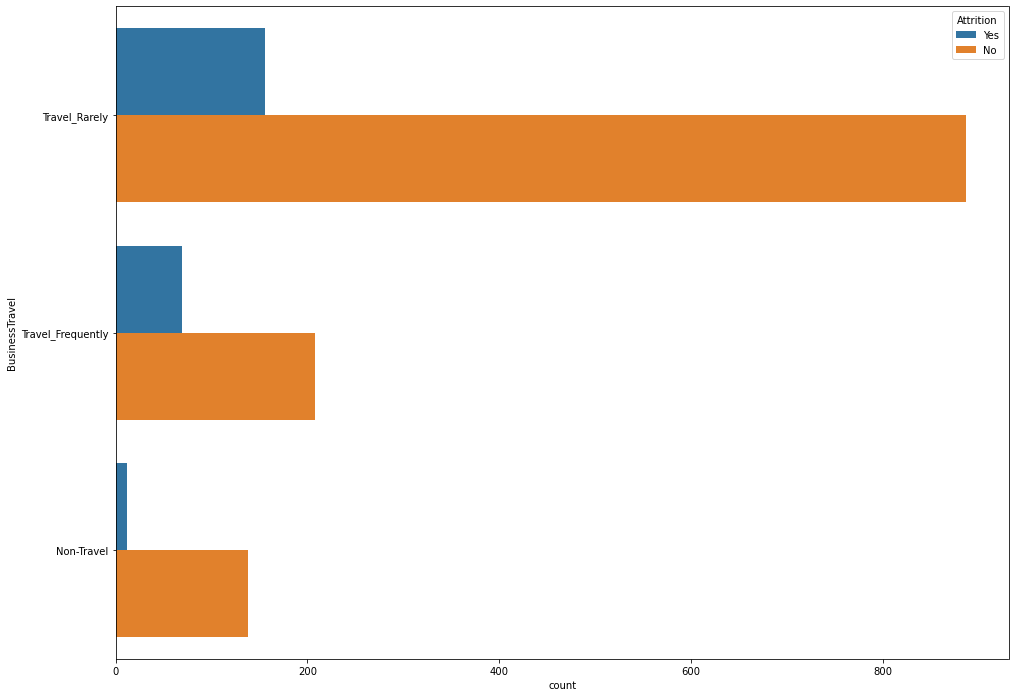

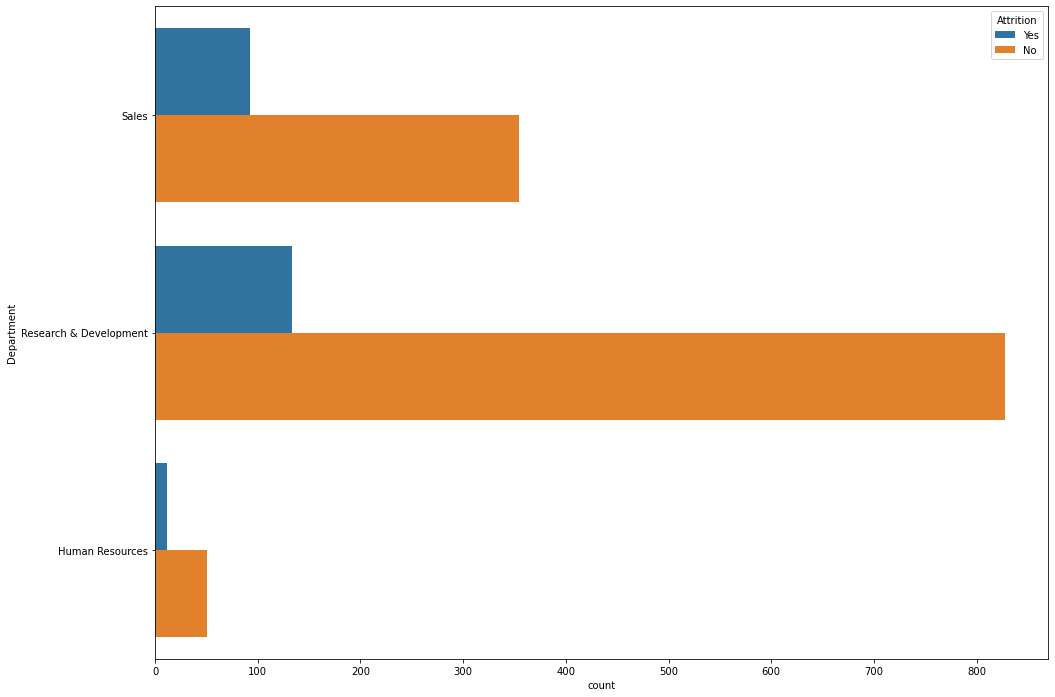

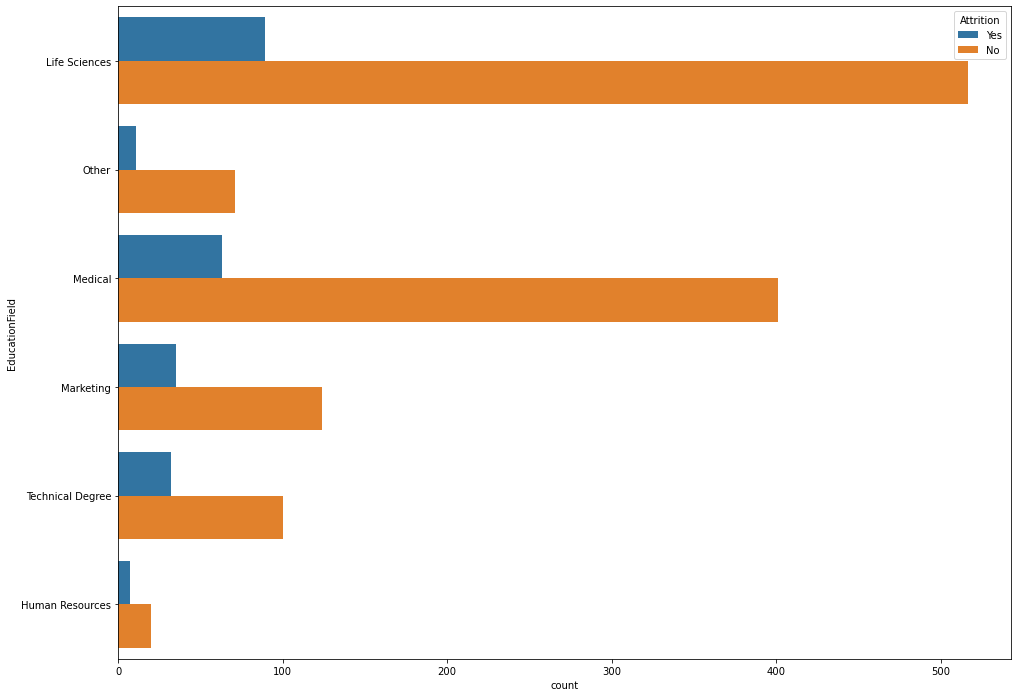

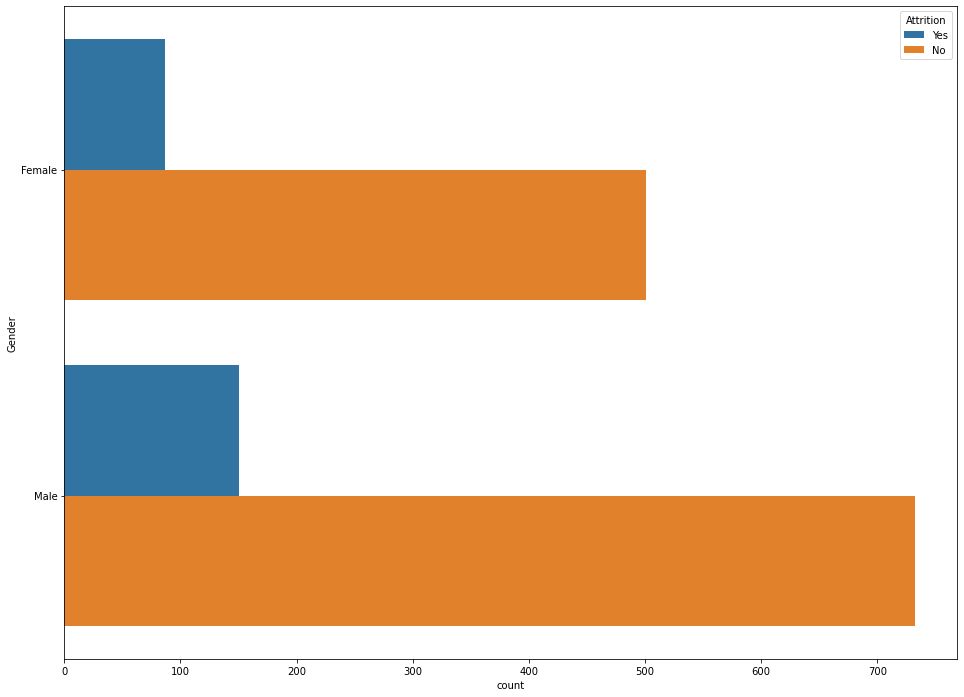

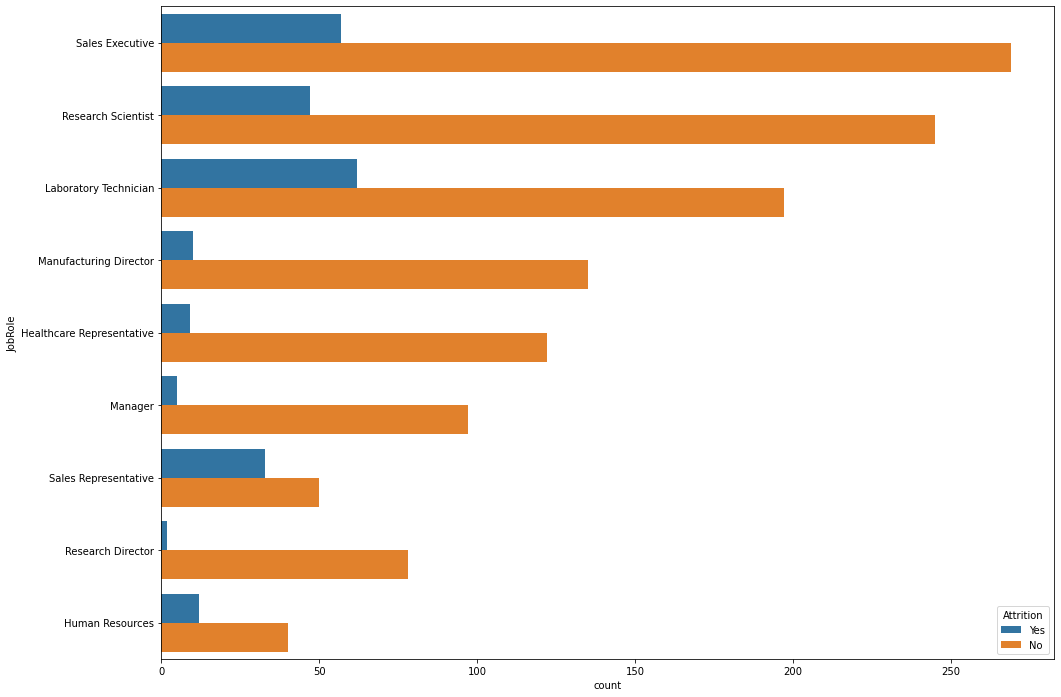

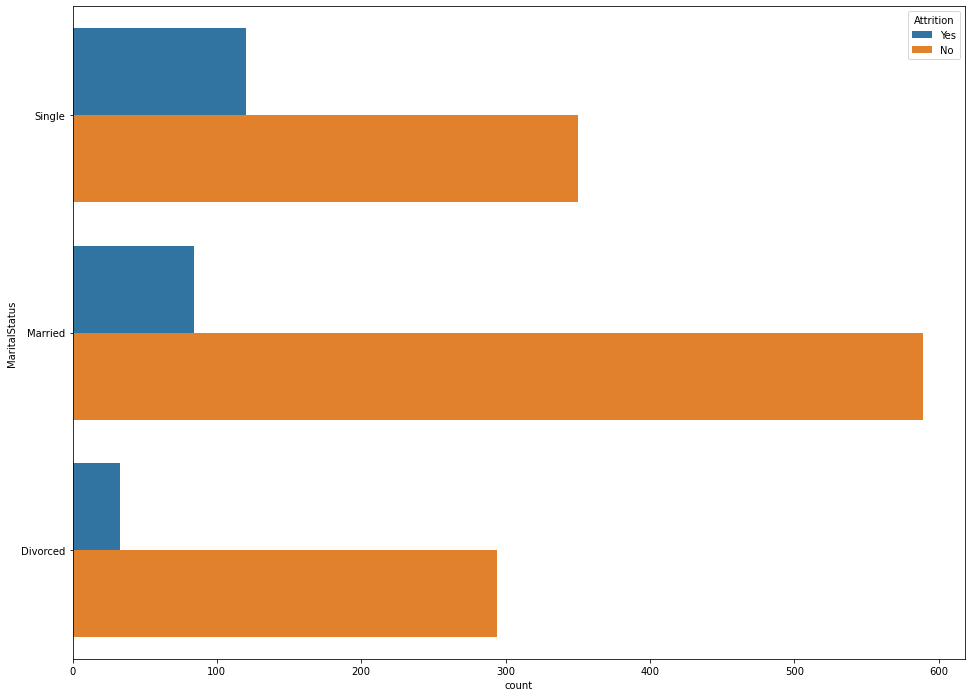

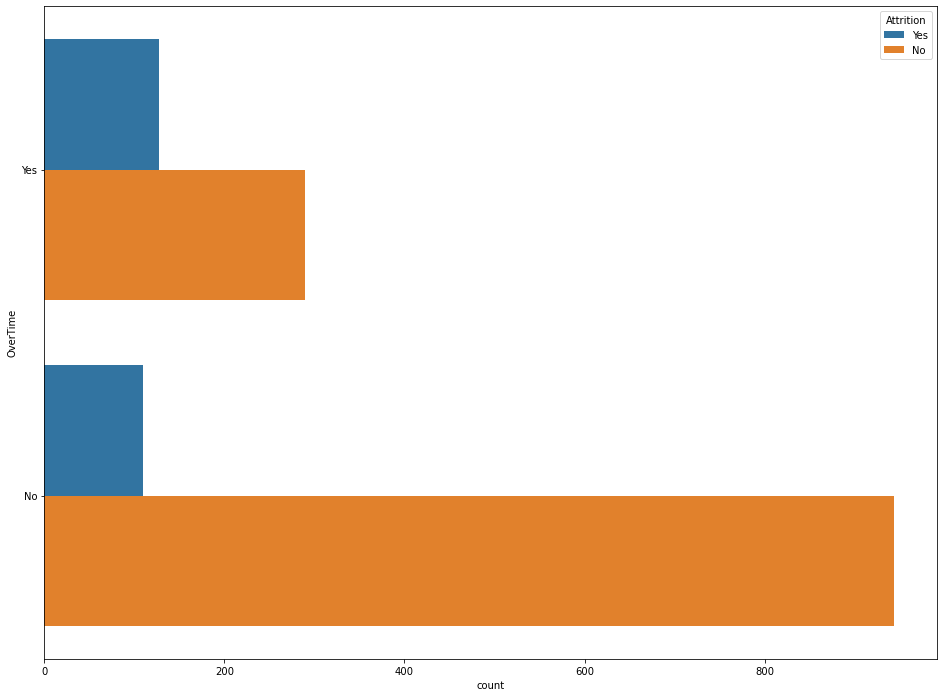

In [13]:
cat_vars = list(df.select_dtypes(['object']).columns)
for var in cat_vars:
    if var == 'Attrition':
        continue
    plt.figure(figsize = (16,12))
    sns.countplot(y=var, data = df, hue='Attrition')
    plt.show()

#### Reformating strings into integral data

Features which are represented in string format:
* BusinessTravel
* Department
* EducationField
* Gender
* JobRole
* MaritalStatus
* OverTime

In [14]:
# df['Department'].value_counts()

In [15]:
# df['Department'] = df['Department'].map({'Research & Development': 2, 'Sales': 1, 'Human Resources': 0})
# label_encoder = preprocessing.LabelEncoder()
# df['Department'] = label_encoder.fit_transform(df['Department'])

In [16]:
# df['BusinessTravel'].value_counts()

In [17]:
# df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely': 2, 'Travel_Frequently': 1, 'Non-Travel': 0})
# label_encoder = preprocessing.LabelEncoder()
# df['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])

In [18]:
# df['EducationField'].value_counts()

In [19]:
# label_encoder = preprocessing.LabelEncoder()
# df['EducationField'] = label_encoder.fit_transform(df['EducationField'])

In [20]:
# df['Gender'].value_counts()

In [21]:
# label_encoder = preprocessing.LabelEncoder()
# df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [22]:
# df['JobRole'].value_counts()

In [23]:
# label_encoder = preprocessing.LabelEncoder()
# df['JobRole'] = label_encoder.fit_transform(df['JobRole'])

In [24]:
# df['MaritalStatus'].value_counts()

In [25]:
# label_encoder = preprocessing.LabelEncoder()
# df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])

In [26]:
# df['OverTime'].value_counts()

In [27]:
# label_encoder = preprocessing.LabelEncoder()
# df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

### Label Encoding

In [28]:
#setting date as index
df.set_index('EmployeeNumber', inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [29]:
target = ['Attrition']
cat_vars = list(df.select_dtypes(['object']).columns)
cat_vars = [_ for _ in cat_vars if _ != 'Attrition']
num_vars = list(df.select_dtypes(exclude=['object']).columns)

In [30]:
#Creating pipeline to transform data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('oneHot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,num_vars),
    ('cat',categorical_transformer,cat_vars)])

transformed_df = preprocessor.fit_transform(df)

In [31]:
transformed_df

array([[ 0.4463504 ,  0.74252653, -1.01090934, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.008343  ,  1.41436324, -0.88751511, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  0.        ,
         1.        ,  0.        ],
       [-0.32016256, -0.43256792, -0.14714972, ...,  0.        ,
         1.        ,  0.        ]])

In [32]:
# Label encoding the target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

## Preparing the model

### Splitting the data

In [33]:
#Splitting data into train and test data
X = transformed_df
y = df.Attrition.values

In [34]:
X

array([[ 0.4463504 ,  0.74252653, -1.01090934, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.008343  ,  1.41436324, -0.88751511, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  0.        ,
         1.        ,  0.        ],
       [-0.32016256, -0.43256792, -0.14714972, ...,  0.        ,
         1.        ,  0.        ]])

In [35]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Since we have a classification type problem, we can use Supervised or Unsupervised learning. As we're trying to find whether the employee is currently employed or has resigned, we'll be using Supervised learning methods like KNN and Random Forest and select the best model.

###  Using K Nearest Neighbour algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [38]:
# Building model using 5 nearest neighbours
knn_classifier = KNeighborsClassifier(n_neighbors=5)  
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy*100

85.37414965986395

In [39]:
# Using 7 nearest neighbours
knn_classifier = KNeighborsClassifier(n_neighbors=7)  
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy*100

86.05442176870748

### Using Random Forest

In [40]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

Checking feature importance

In [41]:
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_*100,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
9,7.169728
0,6.155044
1,5.115182
16,5.105916
10,4.662438
2,4.545485
5,4.449805
19,4.100464
12,3.166848
22,3.005885


In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [43]:
sfm = SelectFromModel(clf, threshold=0.02)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000,
                                                 random_state=0),
                threshold=0.02)

In [44]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [45]:
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0)
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

Comparing accuracies

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)*100

87.75510204081633

In [48]:
y_important_pred = clf_important.predict(X_important_test)
accuracy_score(y_test, y_important_pred)*100

87.75510204081633

### Using XGBoost

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [55]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)*100

89.1156462585034

Tuning parameters

In [191]:
xgb = XGBClassifier(
    random_state=1,
    learning_rate=0.4, 
    objective="reg:logistic")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [192]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)*100

89.45578231292517

Among kNN, Random Forest and XGBoost, we get the best accuracy for the XGBoost model

After feature selection, we reduced the number of features at the cost of very small decrease in accuracy

### Saving the model

In [193]:
final_model = xgb

In [195]:
import joblib
joblib.dump(final_model, 'employee_att.h5')

['employee_att.h5']